In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
train_dir = r"D:\BTL MACHINE LEARNING\RAF\DATASET\train"
test_dir  = r"D:\BTL MACHINE LEARNING\RAF\DATASET\test"


In [40]:
IMG_SIZE = (48, 48)
BATCH = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    shuffle=False
)


Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Found 7178 files belonging to 7 classes.


Số lượng ảnh mỗi lớp: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


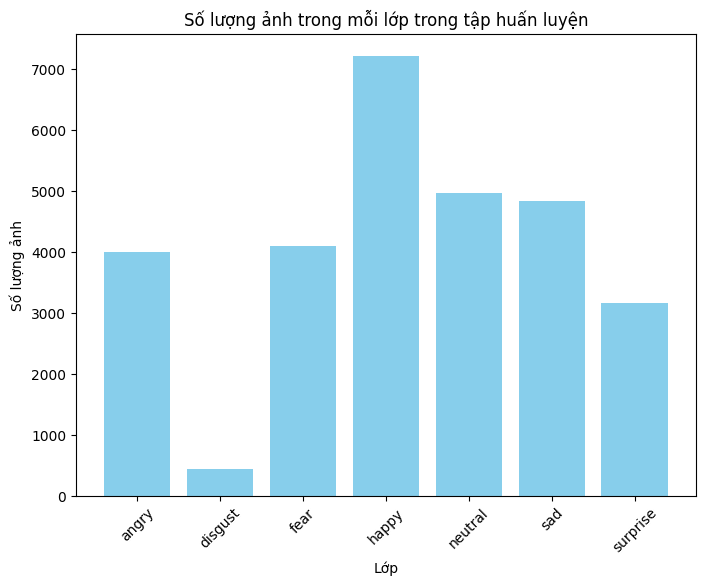

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = r"D:\BTL MACHINE LEARNING\RAF\DATASET\train" 

classes = os.listdir(train_dir)

class_counts = {}
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)   
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images

print("Số lượng ảnh mỗi lớp:", class_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(8,6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Số lượng ảnh trong mỗi lớp trong tập huấn luyện")
plt.xlabel("Lớp")
plt.ylabel("Số lượng ảnh")
plt.xticks(rotation=45)
plt.show()


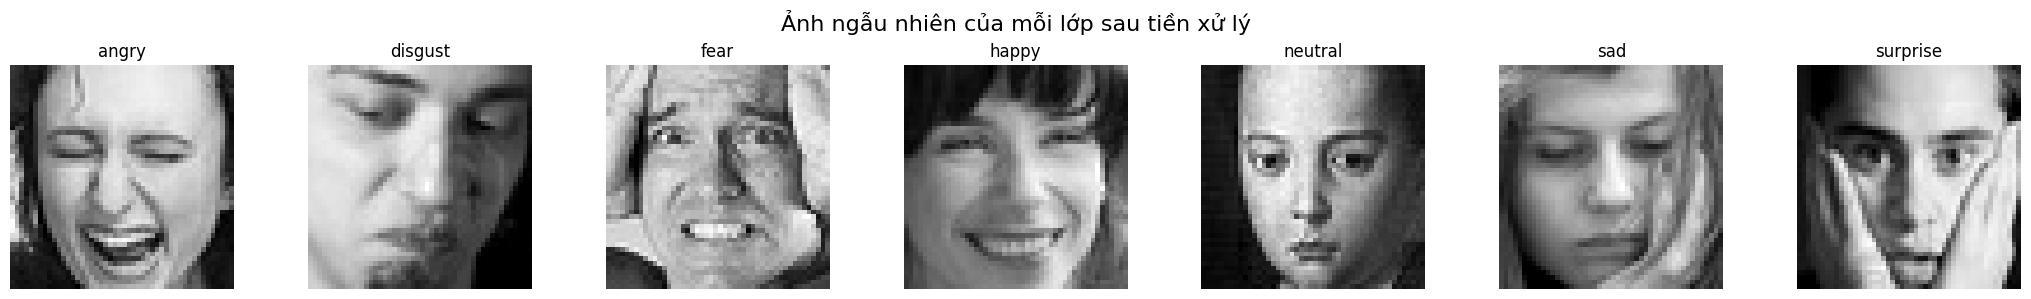

In [ ]:

import random
import matplotlib.pyplot as plt

class_names = train_ds.class_names
num_classes = len(class_names)

for images, labels in train_ds.take(1):
    plt.figure(figsize=(3*num_classes, 3))  # tùy chỉnh kích thước khung

    for i, class_name in enumerate(class_names):
        # chọn ngẫu nhiên 1 ảnh thuộc lớp đó
        indices = np.where(np.argmax(labels, axis=1) == i)[0]
        if len(indices) == 0:
            continue
        idx = random.choice(indices)
        img = images[idx].numpy().astype("float32")
        
        plt.subplot(1, num_classes, i+1)  # 1 hàng, n cột
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(class_name)
        plt.axis('off')

    plt.suptitle("Ảnh ngẫu nhiên của mỗi lớp sau tiền xử lý", fontsize=16)
    plt.tight_layout()
    plt.show()
    break


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models



def build_cnn(input_shape=(48,48,1), n_classes=7):
    inp = layers.Input(input_shape)
    x = layers.Conv2D(32,(3,3),padding='same',activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128,(5,5),padding='same',activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128,(3,3),padding='same',activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256,(5,5),padding='same',activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(256,(3,3),padding='same',activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2,2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    out = layers.Dense(n_classes, activation='softmax')(x)
    return models.Model(inputs=inp, outputs=out)

model = build_cnn()
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0   

den day roi


In [44]:

def loss_function(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.0)
    loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1)
    return tf.reduce_mean(loss)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=loss_function,
    metrics=['accuracy']
)


In [45]:


abc = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,               
    validation_data=val_ds,
    epochs= 55,              
    verbose=1,
    shuffle=True,
    callbacks = abc
)

Epoch 1/55
359/359 [==============================] - 24s 58ms/step - loss: 2.8379 - accuracy: 0.1725 - val_loss: 1.8630 - val_accuracy: 0.2245 - lr: 1.0000e-04
Epoch 2/55
359/359 [==============================] - 23s 65ms/step - loss: 2.4922 - accuracy: 0.1980 - val_loss: 1.7809 - val_accuracy: 0.2818 - lr: 1.0000e-04
Epoch 3/55
359/359 [==============================] - 27s 75ms/step - loss: 2.2988 - accuracy: 0.2181 - val_loss: 1.7334 - val_accuracy: 0.3045 - lr: 1.0000e-04
Epoch 4/55
359/359 [==============================] - 27s 74ms/step - loss: 2.1779 - accuracy: 0.2412 - val_loss: 1.6950 - val_accuracy: 0.3332 - lr: 1.0000e-04
Epoch 5/55
359/359 [==============================] - 27s 75ms/step - loss: 2.0805 - accuracy: 0.2671 - val_loss: 1.6369 - val_accuracy: 0.3613 - lr: 1.0000e-04
Epoch 6/55
359/359 [==============================] - 28s 78ms/step - loss: 1.9523 - accuracy: 0.3132 - val_loss: 1.5643 - val_accuracy: 0.3905 - lr: 1.0000e-04
Epoch 7/55
359/359 [==============

In [46]:
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

y_pred = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_labels, digits=4))


113/113 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

           0     0.5527    0.5198    0.5358       958
           1     0.7561    0.2793    0.4079       111
           2     0.4554    0.3193    0.3754      1024
           3     0.7972    0.8467    0.8212      1774
           4     0.5299    0.6180    0.5706      1233
           5     0.4399    0.5132    0.4737      1247
           6     0.8016    0.7148    0.7557       831

    accuracy                         0.6066      7178
   macro avg     0.6190    0.5445    0.5629      7178
weighted avg     0.6077    0.6066    0.6021      7178



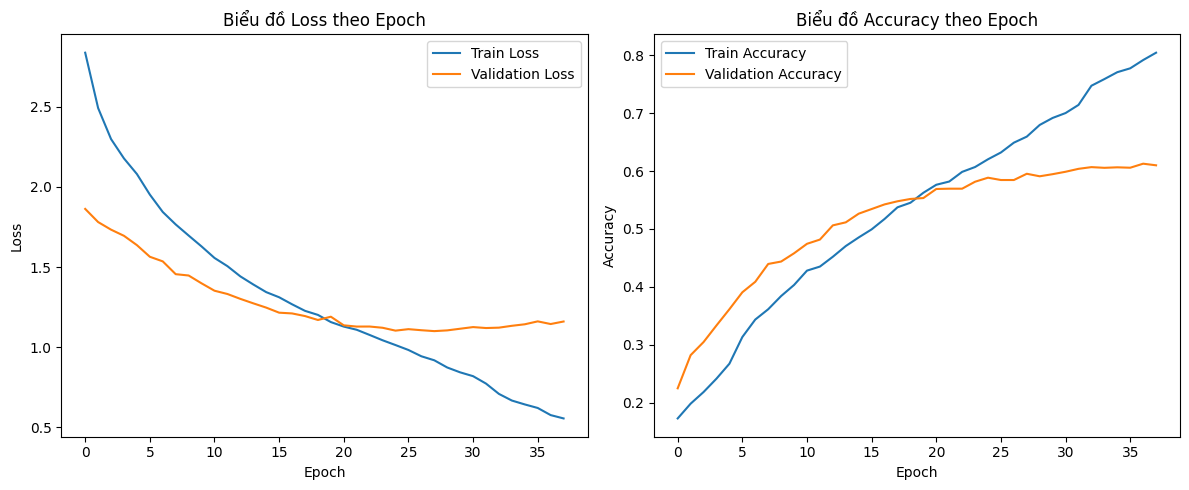

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Biểu đồ Loss theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Biểu đồ Accuracy theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


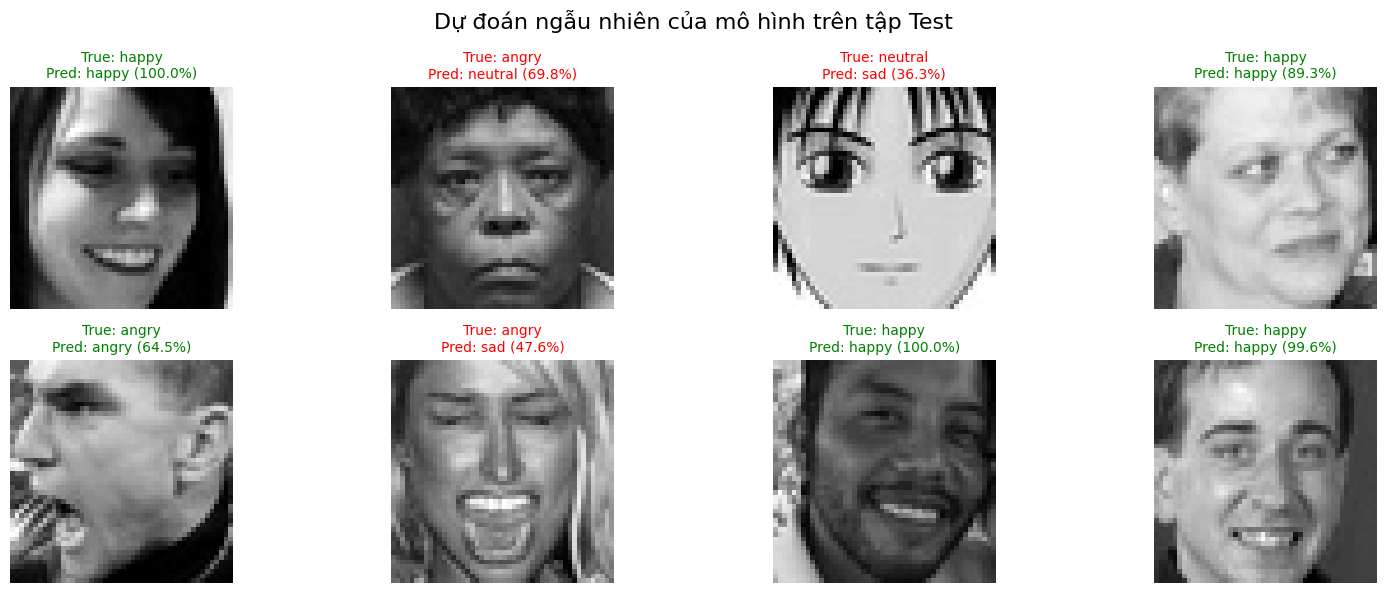

In [ ]:

import random
import matplotlib.pyplot as plt

class_names = test_ds.class_names

x_test = []
y_test = []
for images, labels in test_ds:
    x_test.append(images)
    y_test.append(labels)
x_test = tf.concat(x_test, axis=0)
y_test = tf.concat(y_test, axis=0)

indices = random.sample(range(len(x_test)), 8)

plt.figure(figsize=(16, 6))
for i, idx in enumerate(indices):
    img = x_test[idx].numpy()
    true_label = class_names[np.argmax(y_test[idx])]


    pred = model.predict(img[np.newaxis, ...], verbose=0)
    pred_label = class_names[np.argmax(pred)]
    conf = np.max(pred) * 100

    plt.subplot(2, 4, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label} ({conf:.1f}%)", color=color, fontsize=10)
    plt.axis('off')

plt.suptitle("Dự đoán ngẫu nhiên của mô hình trên tập Test", fontsize=16)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Ma trận nhầm lẫn của Nhận diện cảm xúc')

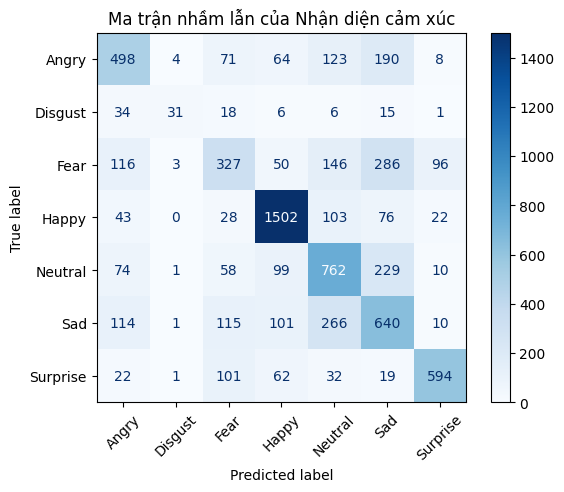

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
cm = metrics.confusion_matrix(y_true, y_pred_labels)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.title("Ma trận nhầm lẫn của Nhận diện cảm xúc")


In [ ]:
model.save('cnn_model_RAF.h5')